In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python (found version "2.7.17") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython2.7.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/media/psf/Home/Sites/facu/mt/tp3
-- Configuring done
-- Generating done
-- Build files have

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import metnum

In [19]:
df = pd.read_csv('data.csv')

In [20]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

t= df.corr()

In [21]:
t

,Unnamed: 0,id,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
Unnamed: 0,1.000000,0.004001,-0.002896,0.870024,0.014681,0.007744,-0.003850,-0.003154,-0.005314,-0.006597,-0.001680,-0.002304,0.007929,0.005140,-0.005719,0.000029,0.002692,0.006579,-0.002523,0.000630,-0.003898
id,0.004001,1.000000,-0.000219,0.003405,-0.001941,-0.003870,0.006576,-0.008407,-0.003969,-0.007437,-0.000672,-0.007081,0.006822,-0.004533,0.010210,0.006164,-0.000995,-0.000634,0.005503,0.003476,-0.005260
tipodepropiedad,-0.002896,-0.000219,1.000000,-0.002180,-0.061526,-0.094835,0.049562,-0.130785,-0.180410,-0.118488,-0.135838,-0.098452,0.102102,-0.069220,0.029541,0.071497,0.011978,0.010499,-0.050575,-0.012316,0.056882
direccion,0.870024,0.003405,-0.002180,1.000000,0.033113,0.033415,0.006089,-0.002546,-0.025860,-0.026472,-0.020476,-0.022512,-0.008235,0.017669,-0.017383,-0.014835,-0.011099,-0.013584,-0.005465,-0.002704,-0.043804
ciudad,0.014681,-0.001941,-0.061526,0.033113,1.000000,0.372579,-0.102282,-0.024932,-0.100876,-0.107190,-0.095760,-0.021691,-0.119549,-0.016468,0.047247,-0.026239,-0.040811,0.015962,-0.021008,-0.047366,-0.208324
provincia,0.007744,-0.003870,-0.094835,0.033415,0.372579,1.000000,-0.240366,0.030262,-0.042889,0.005343,-0.024865,0.038165,-0.168132,0.301120,-0.187629,-0.025236,-0.033987,0.082307,-0.020912,-0.038202,-0.256990
antiguedad,-0.003850,0.006576,0.049562,0.006089,-0.102282,-0.240366,1.000000,0.185871,-0.114877,-0.054455,0.131183,0.068833,0.030892,-0.105633,0.050735,-0.140648,-0.140048,-0.177284,-0.052159,-0.066793,0.078449
habitaciones,-0.003154,-0.008407,-0.130785,-0.002546,-0.024932,0.030262,0.185871,1.000000,0.262745,0.487056,0.523974,0.373301,-0.036671,-0.026283,0.011107,-0.045694,-0.009393,-0.011857,0.014538,-0.012621,0.211176
garages,-0.005314,-0.003969,-0.180410,-0.025860,-0.100876,-0.042889,-0.114877,0.262745,1.000000,0.457434,0.471706,0.454403,-0.019646,-0.016455,0.006137,0.110540,0.134290,0.119672,0.071042,0.069885,0.416873
banos,-0.006597,-0.007437,-0.118488,-0.026472,-0.107190,0.005343,-0.054455,0.487056,0.457434,1.000000,0.673305,0.542036,0.026761,-0.093243,0.075009,0.118621,0.145693,0.166352,0.036669,0.033896,0.524153


In [22]:
t.to_csv('corre.csv')

In [23]:
x = df[['banos']].values
y = df['precio'].values

In [24]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [25]:
x.shape

(49881, 1)

In [26]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(x,y)

In [27]:
df['prediction'] = linear_regressor.predict(x)

In [38]:
df2 = df[['banos','precio','prediction']]

In [40]:
df2.to_csv('banos.csv')

In [48]:
import plotly as py
import plotly.graph_objs as go
from scipy import special
import plotly.offline as pyo
py.offline.init_notebook_mode(connected=True)

In [55]:
def buildChart(x,y,title,xtitle,ytitle):
    tickXfont = dict(
        font=dict(
            family="Courier New",
            size=14,
            color="#2a3f5f"),
        text=xtitle
    )
    titleYfont = dict(
        font=dict(
            family="Courier New",
            size=14,
            color="#2a3f5f"),
        text=ytitle
    )
    tickYfont = dict(
        family="Courier New",
        size=14,
        color="#2a3f5f")
    
    xaxis=dict(
        nticks=40,
        tickfont=dict(size=10,family='Courier New'),
        ticks='outside',
        title=tickXfont,
        showticklabels=True,
        type="linear",
        visible=True,
        rangemode="normal",
        color="#444",
        showexponent="all",
        separatethousands=False,
        tickcolor="#444",
        gridcolor="#EBF0F8",
        linecolor='#C5CED9',
        gridwidth=1,
        zerolinecolor="#EBF0F8",
        zerolinewidth=2,
        zeroline=True,
        automargin=True,
        layer="above traces",
        fixedrange=False,
        constrain="range",
        constraintoward="center"
    )
    yaxis=dict(
        tickfont=tickYfont,
        ticks='outside',
        title=titleYfont
    )
    fig = go.Figure(data=[
        go.Scatter(y=y,x=x)
    ])
    fig.update_layout(title=title,plot_bgcolor='#FFF',barmode='group',xaxis=xaxis,yaxis=yaxis)
    fig.write_html('{0}.html'.format(title), auto_open=True)

In [56]:
buildChart(df['banos'],df['precio'],'banos vs precios','banos','precios')
fig = go.Figure(df, x='banos', y='precio')
fig.write_html('first_figure.html', auto_open=True)


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [       Unnamed: 0      id  tipodepropiedad  direccion  ciudad  provincia  \
0               1   53461                0          0       0          0   
1               3  209067                1          1       1          1   
2               5  126147                2          2       2          0   
3               7    5013                1          3       3          2   
4              12   47890                1          4       4          3   
5              16  283945                1          5       4          3   
6              31  118889                1          6       5          4   
7              44   92610                1          7       6          0   
8              45  274931                0          8       7          5   
9              53  198249                2          9       6          0   
10             64  171944                2         10       8          0   
11             68  182136                0         11       9          6   
12             72  137214                1         12      10          1   
13             77    9271                1         13      11          7   
14             81  200567                2         14      12          0   
15             82   18684                0         15       4          3   
16             87  166800                1         16      13          2   
17            101   10414                1         17      14          6   
18            106  114276                1         18      15          0   
19            110  139467                2         19      12          0   
20            114   48369                1         20      16          8   
21            116   49646                2         21      17          9   
22            119  158350                1         22      18         10   
23            120   68608                1         23      19         11   
24            123  277149                1         24      20         11   
25            134  233065                1         25      21         12   
26            138  246928                2         26      22          0   
27            148  232596                1         27      23         13   
28            150   46540                2         28      24          0   
29            151   37970                1         29      25         14   
...           ...     ...              ...        ...     ...        ...   
49851      239888  214020                1      44331      46         18   
49852      239889  184064                1      44332      13          2   
49853      239900  284806                1      44333      79         25   
49854      239904  134633                1      44334      87         16   
49855      239905   12666                1      13764      10          1   
49856      239908   13986                0      29357      16          8   
49857      239909  164231                1      44335      14          6   
49858      239934   37065                1      44336      19         11   
49859      239941  281601                1      44337       6          0   
49860      239944   80077                1      44338      19         11   
49861      239946  279303                2      44339      22          0   
49862      239947  256508                2      44340      28          0   
49863      239948   48555                0      44341      19         11   
49864      239956  205041                0        343      32          1   
49865      239960  141699                1      44342      17          9   
49866      239961  256840                0      44343       2          0   
49867      239964  273538                1      44344      19         11   
49868      239968  129981                2      44345      22          0   
49869      239969   65725                1      44346      32          1   
49870      239971    2747                2       9445      12          0   
49871      239972  130523                1      44347      45          0   
49872      239979  103355                1      44348      24          0   
49873      239981  199041                1      44349      16          8   
49874      239984  262913                1      44350      33         12   
49875      239989  175203                1      15149       4          3   
49876      239991  137337                2      44351       6          0   
49877      239993  207892                1      44352      19         11   
49878      239994  110268                1      44353      19         11   
49879      239996  259178                1      44354      32          1   
49880      239998  146867                1      44355      28          0   

       antiguedad  habitaciones  garages  banos  metroscubiertos  \
0            10.0           3.0      2.0    2.0            268.0   
1             1.0           2.0      1.0    1.0             63.0   
2             5.0           2.0      1.0    1.0             75.0   
3             2.0           4.0      2.0    3.0            293.0   
4             0.0           3.0      2.0    2.0            170.0   
5             0.0           3.0      2.0    3.0            210.0   
6             5.0           3.0      2.0    2.0            143.0   
7            16.0           3.0      1.0    2.0             90.0   
8             5.0           3.0      2.0    3.0            262.0   
9             0.0           2.0      1.0    1.0             47.0   
10            0.0           2.0      2.0    1.0            100.0   
11            5.0           3.0      2.0    3.0            170.0   
12           20.0           3.0      2.0    2.0            350.0   
13            0.0           3.0      2.0    2.0            150.0   
14            5.0           2.0      2.0    2.0            122.0   
15            0.0           3.0      2.0    2.0            108.0   
16           10.0           2.0      2.0    1.0            100.0   
17           12.0           3.0      3.0    3.0            385.0   
18            3.0           3.0      1.0    1.0            120.0   
19           48.0           2.0      1.0    1.0             75.0   
20            5.0           2.0      1.0    1.0             55.0   
21            0.0           4.0      2.0    3.0            277.0   
22            1.0           3.0      2.0    2.0            130.0   
23            5.0           3.0      2.0    2.0            110.0   
24           15.0           2.0      0.0    1.0            115.0   
25           10.0           3.0      0.0    1.0            170.0   
26            0.0           2.0      1.0    2.0             65.0   
27           12.0           4.0      2.0    3.0            265.0   
28            5.0           1.0      2.0    1.0             60.0   
29           15.0           3.0      0.0    1.0            102.0   
...           ...           ...      ...    ...              ...   
49851         5.0           1.0      0.0    1.0             40.0   
49852         1.0           3.0      2.0    2.0             90.0   
49853        10.0           3.0      1.0    1.0            151.0   
49854         4.0           2.0      1.0    1.0             87.0   
49855        15.0           3.0      1.0    2.0            200.0   
49856         5.0           3.0      1.0    2.0             75.0   
49857        10.0           3.0      2.0    1.0            226.0   
49858        20.0           8.0      0.0    2.0            350.0   
49859        20.0           3.0      1.0    2.0             90.0   
49860         5.0           3.0      1.0    2.0            136.0   
49861        27.0           2.0      2.0    1.0             58.0   
49862         5.0           2.0      0.0    1.0             50.0   
49863         9.0           2.0      1.0    1.0             73.0   
49864         0.0           3.0      2.0    2.0            160.0   
49865        13.0           4.0      2.0    3.0            240.0   
49866        20.0           3.0      0.0    1.0             97.0   
49867         0.0           3.0      2.0    2.0            210.0   
49868        10.0           2.0      1.0    2.0             77.0   
49869         1.0           3.0      1.0    2.0             85.0   
49870         4.0           3.0      2.0    2.0            152.0   
49871        20.0           5.0      2.0    2.0            217.0   
49872        10.0           3.0      2.0    1.0            198.0   
49873        10.0           2.0      1.0    1.0             50.0   
49874        20.0           2.0      1.0    1.0             62.0   
49875         2.0           3.0      2.0    2.0            347.0   
49876        20.0           2.0      1.0    1.0             68.0   
49877         1.0           3.0      2.0    3.0            150.0   
49878         3.0           2.0      2.0    2.0            160.0   
49879         0.0           3.0      3.0    3.0            200.0   
49880        20.0           4.0      0.0    4.0            235.0   

       metrostotales      idzona        lat         lng  gimnasio  \
0              180.0     24514.0  19.310205  -99.227655       0.0   
1               67.0     53666.0  19.301890  -99.688015       0.0   
2               90.0     23650.0  19.300612  -99.148475       0.0   
3              293.0    130510.0  20.672612  -87.037968       0.0   
4              141.0     83666.0  20.682878 -100.317503       0.0   
5              275.0     84338.0  20.708760 -100.459303       0.0   
6              196.0     79349.0  18.969631  -98.238497       0.0   
7              110.0     24125.0  19.375452  -99.128082       0.0   
8              170.0    129943.0  18.015243  -92.930238       0.0   
9               47.0     24107.0  19.406071  -99.059646       0.0   
10             100.0     23376.0  19.334247  -99.242254       1.0   
11             132.0     66617.0  18.799324  -99.202627       0.0   
12             385.0     55795.0  19.517815  -99.241453       0.0   
13             250.0     15675.0  28.617962 -106.095627       0.0   
14             122.0     23579.0  19.365597  -99.178828       0.0   
15              98.0     84028.0  20.646004 -100.352765       0.0   
16             120.0  50003005.0  21.135203  -86.870866       0.0   
17             408.0     65723.0  18.932857  -99.230038       0.0   
18             400.0     24652.0  19.190523  -99.085356       0.0   
19              75.0  50003997.0  19.384917  -99.158442       0.0   
20              60.0      2637.0  32.457221 -116.842442       0.0   
21             145.0     94459.0  29.071511 -110.959892       0.0   
22             140.0      1232.0  21.946139 -102.343675       0.0   
23              85.0     47928.0  20.761829 -103.384681       0.0   
24              50.0     47416.0  20.630351 -103.343631       0.0   
25             105.0     71735.0  25.709459 -100.145883       0.0   
26              68.0     23408.0  19.459710  -99.180036       1.0   
27             250.0     91661.0  25.174000 -107.486000       0.0   
28              60.0    275358.0  19.432038  -99.190812       0.0   
29             126.0      7620.0  25.505742 -103.408184       0.0   
...              ...         ...        ...         ...       ...   
49851          120.0      9158.0  16.759685  -93.186241       0.0   
49852          120.0  50002962.0  21.129436  -86.835691       0.0   
49853          151.0     59924.0  19.731787 -101.171422       0.0   
49854          103.0     41927.0  20.065818  -98.705989       0.0   
49855          125.0     55894.0  19.496204  -99.265884       0.0   
49856          137.0      2469.0  32.530750 -116.876163       0.0   
49857          115.0     65711.0  18.916135  -99.195688       0.0   
49858          250.0     47853.0  20.724085 -103.388814       0.0   
49859          140.0     24105.0  19.380821  -99.099361       0.0   
49860          162.0     47974.0  20.742276 -103.432464       0.0   
49861           58.0     23415.0  19.505186  -99.188496       0.0   
49862           50.0     24216.0  19.356915  -99.019900       0.0   
49863           67.0     47970.0  20.751499 -103.439026       0.0   
49864          126.0     52059.0  19.351525  -99.605600       0.0   
49865          140.0     94183.0  29.121999 -110.998793       0.0   
49866           84.0     23589.0  19.357582  -99.103459       0.0   
49867          140.0    311170.0  20.767028 -103.394271       0.0   
49868           77.0     23402.0  19.472963  -99.187187       0.0   
49869           68.0     52104.0  19.367116  -99.582782       0.0   
49870          152.0  50003995.0  19.367193  -99.153030       0.0   
49871          120.0     23872.0  19.402050  -99.132807       0.0   
49872          122.0     24547.0  19.457797  -99.209211       0.0   
49873           65.0      2455.0  32.486000 -116.987722       0.0   
49874           65.0     68789.0  25.695872 -100.335367       0.0   
49875          404.0     83780.0  20.648319 -100.433545       0.0   
49876           68.0     24118.0  19.403309  -99.119023       0.0   
49877          150.0     48046.0  20.615574 -103.456215       0.0   
49878           90.0     48029.0  20.604484 -103.450049       0.0   
49879          250.0     51954.0  19.294665  -99.692916       0.0   
49880          137.0     24162.0  19.366651  -99.082246       1.0   

       usosmultiples  piscina  escuelascercanas  centroscomercialescercanos  \
0                0.0      0.0               1.0                         1.0   
1                0.0      0.0               1.0                         1.0   
2                0.0      0.0               0.0                         1.0   
3                0.0      0.0               0.0                         0.0   
4                1.0      0.0               1.0                         1.0   
5                0.0      0.0               1.0                         1.0   
6                1.0      0.0               1.0                         1.0   
7                0.0      0.0               1.0                         1.0   
8                0.0      0.0               0.0                         0.0   
9                0.0      0.0               1.0                         1.0   
10               1.0      1.0               1.0                         1.0   
11               0.0      1.0               1.0                         1.0   
12               0.0      0.0               0.0                         0.0   
13               0.0      0.0               0.0                         0.0   
14               0.0      0.0               1.0                         1.0   
15               1.0      1.0               1.0                         1.0   
16               0.0      0.0               1.0                         1.0   
17               0.0      1.0               1.0                         1.0   
18               0.0      0.0               0.0                         0.0   
19               0.0      0.0               1.0                         1.0   
20               0.0      0.0               1.0                         1.0   
21               0.0      0.0               1.0                         1.0   
22               0.0      0.0               1.0                         1.0   
23               0.0      0.0               1.0                         1.0   
24               0.0      0.0               1.0                         0.0   
25               0.0      0.0               1.0                         1.0   
26               1.0      0.0               1.0                         1.0   
27               0.0      0.0               0.0                         0.0   
28               0.0      0.0               1.0                         1.0   
29               0.0      0.0               1.0                         0.0   
...              ...      ...               ...                         ...   
49851            0.0      0.0               1.0                         1.0   
49852            0.0      0.0               0.0                         0.0   
49853            0.0      0.0               1.0                         1.0   
49854            0.0      0.0               1.0                         1.0   
49855            0.0      0.0               0.0                         0.0   
49856            1.0      0.0               0.0                         0.0   
49857            0.0      0.0               1.0                         1.0   
49858            0.0      0.0               0.0                         0.0   
49859            0.0      0.0               1.0                         1.0   
49860            0.0      0.0               1.0                         1.0   
49861            0.0      0.0               0.0                         1.0   
49862            0.0      0.0               1.0                         1.0   
49863            1.0      0.0               1.0                         1.0   
49864            0.0      0.0               1.0                         1.0   
49865            0.0      0.0               1.0                         1.0   
49866            0.0      0.0               1.0                         1.0   
49867            0.0      0.0               0.0                         0.0   
49868            0.0      0.0               1.0                         1.0   
49869            0.0      0.0               1.0                         1.0   
49870            0.0      0.0               1.0                         1.0   
49871            0.0      0.0               1.0                         1.0   
49872            0.0      0.0               1.0                         1.0   
49873            0.0      0.0               1.0                         1.0   
49874            0.0      0.0               1.0                         1.0   
49875            1.0      1.0               1.0                         1.0   
49876            0.0      0.0               1.0                         1.0   
49877            0.0      0.0               0.0                         0.0   
49878            0.0      0.0               0.0                         0.0   
49879            0.0      0.0               1.0                         1.0   
49880            0.0      0.0               1.0                         1.0   

          precio    prediction  
0      3600000.0  2.198353e+06  
1       650000.0  1.084524e+06  
2      1100000.0  1.084524e+06  
3      4200000.0  3.312182e+06  
4      1500000.0  2.198353e+06  
5      2450000.0  3.312182e+06  
6      1450000.0  2.198353e+06  
7      1200000.0  2.198353e+06  
8      3700000.0  3.312182e+06  
9       825000.0  1.084524e+06  
10     3500000.0  1.084524e+06  
11     1500000.0  3.312182e+06  
12     3500000.0  2.198353e+06  
13     1100000.0  2.198353e+06  
14     4200000.0  2.198353e+06  
15     1300000.0  2.198353e+06  
16      580000.0  1.084524e+06  
17     4200000.0  3.312182e+06  
18      610000.0  1.084524e+06  
19     1300000.0  1.084524e+06  
20      350000.0  1.084524e+06  
21     1150000.0  3.312182e+06  
22     1100000.0  2.198353e+06  
23      990000.0  2.198353e+06  
24      560000.0  1.084524e+06  
25      550000.0  1.084524e+06  
26     2450000.0  2.198353e+06  
27     3150000.0  3.312182e+06  
28     3800000.0  1.084524e+06  
29      330000.0  1.084524e+06  
...          ...           ...  
49851   580000.0  1.084524e+06  
49852  1100000.0  2.198353e+06  
49853  1283000.0  1.084524e+06  
49854   530000.0  1.084524e+06  
49855  1810000.0  2.198353e+06  
49856   540000.0  2.198353e+06  
49857  1950000.0  1.084524e+06  
49858  1500000.0  2.198353e+06  
49859  2000000.0  2.198353e+06  
49860  1780000.0  2.198353e+06  
49861   620000.0  1.084524e+06  
49862   470000.0  1.084524e+06  
49863   595000.0  1.084524e+06  
49864  1580000.0  2.198353e+06  
49865  1200000.0  3.312182e+06  
49866  1780000.0  1.084524e+06  
49867  2350000.0  2.198353e+06  
49868  1700000.0  2.198353e+06  
49869   715000.0  2.198353e+06  
49870  3750000.0  2.198353e+06  
49871  2400000.0  2.198353e+06  
49872  3300000.0  1.084524e+06  
49873   550000.0  1.084524e+06  
49874   505000.0  1.084524e+06  
49875  3850000.0  2.198353e+06  
49876  1450000.0  1.084524e+06  
49877  1650000.0  3.312182e+06  
49878  1350000.0  2.198353e+06  
49879  1940000.0  3.312182e+06  
49880  2890000.0  4.426010e+06  

[49881 rows x 22 columns]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['splom', 'image', 'table', 'isosurface',
                     'carpet', 'indicator', 'streamtube', 'area',
                     'ohlc', 'pointcloud', 'sunburst', 'funnel',
                     'pie', 'volume', 'heatmapgl', 'scatterpolar',
                     'bar', 'candlestick', 'parcoords', 'scatter',
                     'sankey', 'mesh3d', 'choroplethmapbox',
                     'scattercarpet', 'scatterternary', 'surface',
                     'cone', 'violin', 'scatterpolargl',
                     'histogram2d', 'contour', 'contourcarpet',
                     'parcats', 'heatmap', 'scattermapbox',
                     'scatter3d', 'scattergl', 'funnelarea',
                     'waterfall', 'histogram', 'densitymapbox',
                     'scattergeo', 'box', 'choropleth', 'treemap',
                     'barpolar', 'histogram2dcontour']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

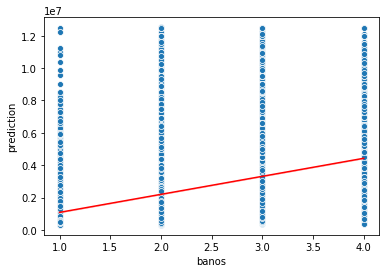

In [34]:
sns.scatterplot(data=df, x='banos', y='precio')
sns.lineplot(data=df, x='banos', y='prediction', color='red')

In [36]:
a= sns.get_figure()

AttributeError: 'module' object has no attribute 'get_figure'